In [351]:
import pandas as pd
import pickle
import json
import seaborn as sns
import pprint
pp = pprint.PrettyPrinter(depth=6)
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 120)

In [352]:
pkl_folder = "../../pkl"
csv_folder = "../../csv"

| Field          | Description                                                     | Type of variable |
|----------------|-----------------------------------------------------------------|------------------|
| fixVersions    | Search for issues that are assigned to a particular fix version | list of versions |
| issuetype      | Type of issue                                                   | Categorical      |
| project        | The project the issue belongs to                                | String           |
| resolution     | The resolution of the issue                                     | Categorical      |
| resolutiondate | The date the issue was resolved                                 | Date             |
| workratio      | calculated as workRatio = (timeSpent / originalEstimate) x 100  | Number           |
| lastViewed     | The date at which the issue was last viewed                     | Date             |
| watches        | Users watching the issue                                        | ?                |
| created        | The date of the creation of the issue                           | Date             |
| priority       | Priority assigned to the issue                                  | Categorical      |
| labels         | Labels assigned to the issue                                    | Strings          |
| versions       | The versions affected by the issue                              | List             |
| assignee       | The user the issue is assigned to                               | User             |
| status         | The status of the issue                                         | Categorical      |
| description    | The description of the issue                                    | String           |
| summary        | A summary of the issue reported                                 | String           |
| creator        | The user that created the issue                                 | User             |
| subtasks       | The subtasks of the issue                                       | List of issues   |
| reporter       | The user who reported the issue. May be the same as the creator | User             |
| duedate        | The date the issue is due to be resolved                        | Date             |

### Import tags

In [353]:
tags = pd.read_csv(f"{csv_folder}/tags_updated.csv", index_col=0)
tags.Date = pd.to_datetime(tags.Date)
tags = tags[tags.Date > "2015-03-10"]
tags["month"] = tags.Date.dt.month
tags["year"] = tags.Date.dt.year
tags.head()

,release_date,Tag,Sha,Date,month,year,major_version,jira_version
0,NaN,4.5.6,12d931e5a31e1692a428bbb34ba11cd63aebf998,2015-10-16 09:31:18,10,2015,4,4.5.6
1,NaN,4.5.7,e2afb0bff1b8be759789d2c1bc9348de6f519f83,2016-04-08 13:44:39,4,2016,4,4.5.7
2,2015-04-23 00:00:00,5.1,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,2015-04-02 08:09:45,4,2015,5,5.1
3,NaN,5.1.1,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2015-06-02 08:34:06,6,2015,5,5.1.1
4,NaN,5.1.2,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,2015-07-27 08:03:21,7,2015,5,5.1.2


### Import issues

In [354]:
issues = pd.read_csv(f"{csv_folder}/issues_community.csv", index_col=0)
for date_field in ["created", "duedate", "lastViewed", "resolutiondate", "updated"]:
    issues[date_field] = pd.to_datetime(issues[date_field], errors="coerce")
issues = issues[issues.created > '2015-03-17 15:04:32+0000']
issues.head()

,updated,environment,creator,issue_id,reporter,issuetype_name,issue_key,assignee,votes,created,project,resolutiondate,status_id,summary,reporter_name,resolution_name,lastViewed,issuetype_id,edition,duedate,status_name,votes_votes,description,priority_id,priority_name,status,assignee_name,creator_name,created_month,created_year
0,2020-09-29 08:54:53+00:00,NaN,Julien Lancelot,97898,Julien Lancelot,Task,SONAR-13913,NaN,0,2020-09-29 08:54:53+00:00,SONAR,NaT,1,Remove table clean up used in Integration Tests,julien.lancelot,NaN,NaT,3,Community,NaT,Open,0,- Remove org.sonar.server.platform.BackendClea...,3,Major,Open,NaN,julien.lancelot,9,2020
1,2020-09-28 10:18:24+00:00,NaN,Malena Ebert,97868,Malena Ebert,Task,SONAR-13912,Malena Ebert,0,2020-09-28 10:14:16+00:00,SONAR,NaT,1,Add OWASP Dependency Check task to Cirrus CI,malena.ebert,NaN,NaT,3,Community,NaT,Open,0,The goal of this task is to detect vulnerabili...,3,Major,Open,malena.ebert,malena.ebert,9,2020
3,2020-09-28 15:38:40+00:00,NaN,Jeremy Davis,97858,Jeremy Davis,New Feature,SONAR-13909,Julien Lancelot,0,2020-09-28 09:20:49+00:00,SONAR,NaT,10002,C# and VB.NET analysis updates,jeremy.davis,NaN,NaT,2,Community,2020-10-05 00:00:00+00:00,In Review,0,The C# analysis now improves complexity rules ...,3,Major,In Review,julien.lancelot,jeremy.davis,9,2020
4,2020-09-28 20:02:41+00:00,NaN,Jeremy Davis,97855,Jeremy Davis,Improvement,SONAR-13907,Julien Lancelot,0,2020-09-28 09:00:01+00:00,SONAR,NaT,10002,JavaScript/TypeScript analysis updates,jeremy.davis,NaN,NaT,4,Community,2020-10-05 00:00:00+00:00,In Review,0,The changes are:\r\n* a new rule to detect XXE...,3,Major,In Review,julien.lancelot,jeremy.davis,9,2020
5,2020-09-24 12:57:08+00:00,NaN,Mathieu Cutivel,97813,Mathieu Cutivel,Improvement,SONAR-13906,Mathieu Cutivel,0,2020-09-24 12:57:00+00:00,SONAR,NaT,3,Prevent ALM binding configuration modal from c...,mathieu.cutivel,NaN,NaT,4,Community,2020-10-01 00:00:00+00:00,In Progress,0,When clicking outside of the ALM configuration...,3,Major,In Progress,mathieu.cutivel,mathieu.cutivel,9,2020


We filter only issues in the timeframe in which the project was using TravisCI

### Import versions

In [355]:
versions = pd.read_csv(f"{csv_folder}/issues_versions.csv", index_col=0)
versions.head()

,issue_id,version_name,version_id
0,97777,8.4.2,16404
1,97773,8.4.2,16404
2,97525,8.4.2,16404
3,97521,8.4,15833
4,97347,8.4.2,16404


### Import fixVersions

In [356]:
fixversions = pd.read_csv(f"{csv_folder}/issues_fixversions.csv", index_col=0)
fixversions = fixversions[fixversions.issue_id.isin(issues.issue_id)]
fixversions.head(5)

,issue_id,fixVersion_name,fixVersion_id
1,97858,8.5,16342
2,97855,8.5,16342
3,97786,8.6,16435
5,97575,8.5,16342
7,97413,8.5,16342


### Import labels

In [357]:
labels = pd.read_csv(f"{csv_folder}/issues_labels.csv", index_col=0)
labels = labels[labels.issue_id.isin(issues.issue_id)]
labels.head()

,issue_id,label
7,97868,trello:5f71b7467b498d57987bfe0a
8,97813,hardening
9,97813,usability-testing-findings
10,97673,hardening
11,97673,usability-testing-findings


### Import components

In [358]:
components = pd.read_csv(f"{csv_folder}/issues_components.csv", index_col=0)
components = components[components.issue_id.isin(issues.issue_id)]
components.head()

,issue_id,component_name,component_id
30,97898,Database,11077
31,97813,UX/UI,11968
32,97786,Organizations,11974
33,97786,Quality Profile,11074
37,97673,UX/UI,11968


### Import subtasks

In [359]:
substaks = pd.read_csv(f"{csv_folder}/issues_subtasks.csv", index_col=0)
substaks = substaks[substaks.issue_id.isin(issues.issue_id)]
substaks.head()

,issue_id,subtask_key,subtask_id
0,97393,SONAR-13858,97372
1,97393,SONAR-13868,97394
2,97387,SONAR-13863,97388
3,97387,SONAR-13864,97389
4,97387,SONAR-13865,97390


## Analysis

### Shape

In [360]:
issues.shape

(4478, 30)

In [361]:
fixversions.shape

(4120, 3)

In [362]:
versions.shape

(3335, 3)

In [363]:
labels.shape

(2153, 2)

In [364]:
substaks.shape

(327, 3)

### Columns

In [365]:
issues.columns

Index(['updated', 'environment', 'creator', 'issue_id', 'reporter',
       'issuetype_name', 'issue_key', 'assignee', 'votes', 'created',
       'project', 'resolutiondate', 'status_id', 'summary', 'reporter_name',
       'resolution_name', 'lastViewed', 'issuetype_id', 'edition', 'duedate',
       'status_name', 'votes_votes', 'description', 'priority_id',
       'priority_name', 'status', 'assignee_name', 'creator_name',
       'created_month', 'created_year'],
      dtype='object')

In [366]:
versions.columns

Index(['issue_id', 'version_name', 'version_id'], dtype='object')

In [367]:
fixversions.columns

Index(['issue_id', 'fixVersion_name', 'fixVersion_id'], dtype='object')

In [368]:
labels.columns

Index(['issue_id', 'label'], dtype='object')

In [369]:
substaks.columns

Index(['issue_id', 'subtask_key', 'subtask_id'], dtype='object')

### Describe

In [370]:
issues = issues[focus_columns]

In [371]:
issues.describe()

,created_month,votes_votes,issuetype_id,issue_id,votes,status_id,priority_id,created_year
count,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000
mean,6.224877,0.145154,3.225994,66027.045333,0.145154,59.072130,3.055159,2017.369361
std,3.326965,0.649676,1.375566,18303.765986,0.649676,729.896774,0.304598,1.553533
min,1.000000,0.000000,1.000000,26987.000000,0.000000,1.000000,1.000000,2015.000000
25%,3.000000,0.000000,2.000000,51324.750000,0.000000,6.000000,3.000000,2016.000000
50%,6.000000,0.000000,4.000000,64374.500000,0.000000,6.000000,3.000000,2017.000000
75%,9.000000,0.000000,4.000000,82515.750000,0.000000,6.000000,3.000000,2019.000000
max,12.000000,14.000000,6.000000,97898.000000,14.000000,10002.000000,5.000000,2020.000000


In [372]:
issues.describe(include = ['O'])

,priority_name,status,assignee,assignee_name,reporter_name,issue_key,creator_name,environment,resolution_name,creator,edition,issuetype_name,description,status_name,project,summary,reporter
count,4478,4478,3896,3896,4478,4478,4478,5,4006,4478,1869,4478,3916,4478,4478,4478,4478
unique,5,7,53,53,76,4478,74,5,9,74,1,6,3883,7,1,4462,76
top,Major,Closed,Stas Vilchik,stas.vilchik,stas.vilchik,SONAR-13594,stas.vilchik,MySQL 5.6.25,Fixed,Stas Vilchik,Community,Improvement,Template names are unique by organization. Con...,Closed,SONAR,Upgrade code analyzers to latest released vers...,Stas Vilchik
freq,4163,3994,607,607,631,1,657,1,3816,657,1869,2442,8,3994,4478,10,631


* Votes has 75% percentile to 0 (most of the issues did not get votes) but has also a value of 14
* There are 6 issuetypes
* There are 7 statuses
    
We therefore safely remove one of each columns and keep the one in the more human readable form

In [373]:
duplicated_columns = ["issuetype", "assignee_key", "creator_key", "resolution", "priority", "reporter_key", "resolution_id"]

In [374]:
issues = issues[set(issues.columns) - set(duplicated_columns)]

In [375]:
fixversions.describe()

,issue_id,fixVersion_id
count,4120.000000,4120.000000
mean,63110.689806,13841.400243
std,16983.063655,1117.370133
min,26987.000000,11624.000000
25%,50473.500000,13287.000000
50%,61860.000000,13961.000000
75%,75037.750000,14549.000000
max,97858.000000,16435.000000


In [376]:
versions.describe()

,issue_id,version_id
count,3335.000000,3335.000000
mean,40027.932834,12169.017091
std,18698.712548,1127.057544
min,26470.000000,11523.000000
25%,28845.000000,11556.000000
50%,30915.000000,11584.000000
75%,45677.500000,11647.000000
max,97777.000000,16404.000000


In [377]:
labels.describe()

,issue_id
count,2153.000000
mean,63120.827682
std,13997.199729
min,27851.000000
25%,53032.000000
50%,59859.000000
75%,67364.000000
max,97868.000000


In [378]:
substaks.describe()

,issue_id,subtask_id
count,327.000000,327.000000
mean,63831.709480,64812.807339
std,17465.431463,16634.620483
min,26991.000000,29633.000000
25%,57685.000000,57717.500000
50%,61889.000000,61948.000000
75%,74858.500000,74894.500000
max,97393.000000,97553.000000


We do not detect anomalies in the statistical summaries of the other datasets

### Missing values

In [379]:
issues.isna().sum().sort_values(ascending=False).head(15)

lastViewed         4478
environment        4473
edition            2609
duedate             820
assignee_name       582
assignee            582
description         562
resolutiondate      472
resolution_name     472
issuetype_id          0
reporter_name         0
reporter              0
issue_key             0
created               0
status                0
dtype: int64

In [380]:
fixversions.isna().sum()

issue_id           0
fixVersion_name    0
fixVersion_id      0
dtype: int64

In [381]:
versions.isna().sum()

issue_id        0
version_name    0
version_id      0
dtype: int64

In [382]:
labels.isna().sum()

issue_id    0
label       0
dtype: int64

In [383]:
substaks.isna().sum()

issue_id       0
subtask_key    0
subtask_id     0
dtype: int64

* There are missing values only in the issues dataset
* All fields presenting missing values are fields which are optional in an issue. We therefore not worry about their absence even though that has to be taken into account when working with those fields.

## In depth analysis

### IssueType

In [384]:
issues.issuetype_name.unique()

array(['Task', 'New Feature', 'Improvement', 'Documentation', 'Sub-task',
       'Bug'], dtype=object)

In [385]:
issues.issuetype_name.value_counts()

Improvement      2442
Bug              1001
Task              366
Sub-task          299
New Feature       284
Documentation      86
Name: issuetype_name, dtype: int64

<AxesSubplot:xlabel='issuetype_name', ylabel='count'>

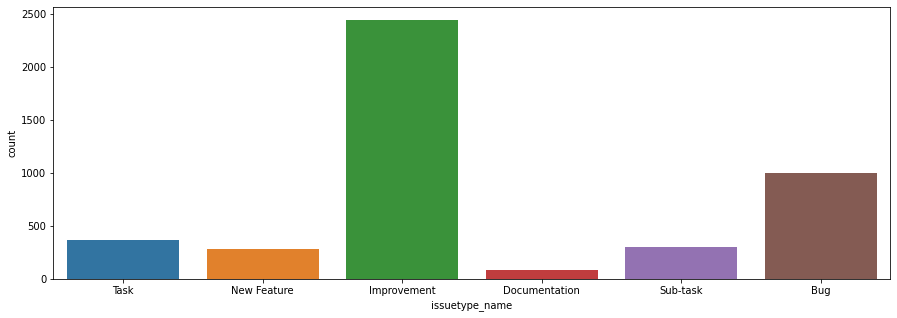

In [386]:
sns.countplot(x="issuetype_name", data=issues[["issue_id", "issuetype_name"]])

In [387]:
issues.issuetype_name.value_counts(normalize=True)

Improvement      0.545333
Bug              0.223537
Task             0.081733
Sub-task         0.066771
New Feature      0.063421
Documentation    0.019205
Name: issuetype_name, dtype: float64

* We see that issues can only have one of these 6 issue types.
* 54% is Improvement, followed by 22% Bug

In [388]:
issues["created_month"] = issues.created.dt.month
issues["created_year"] = issues.created.dt.year

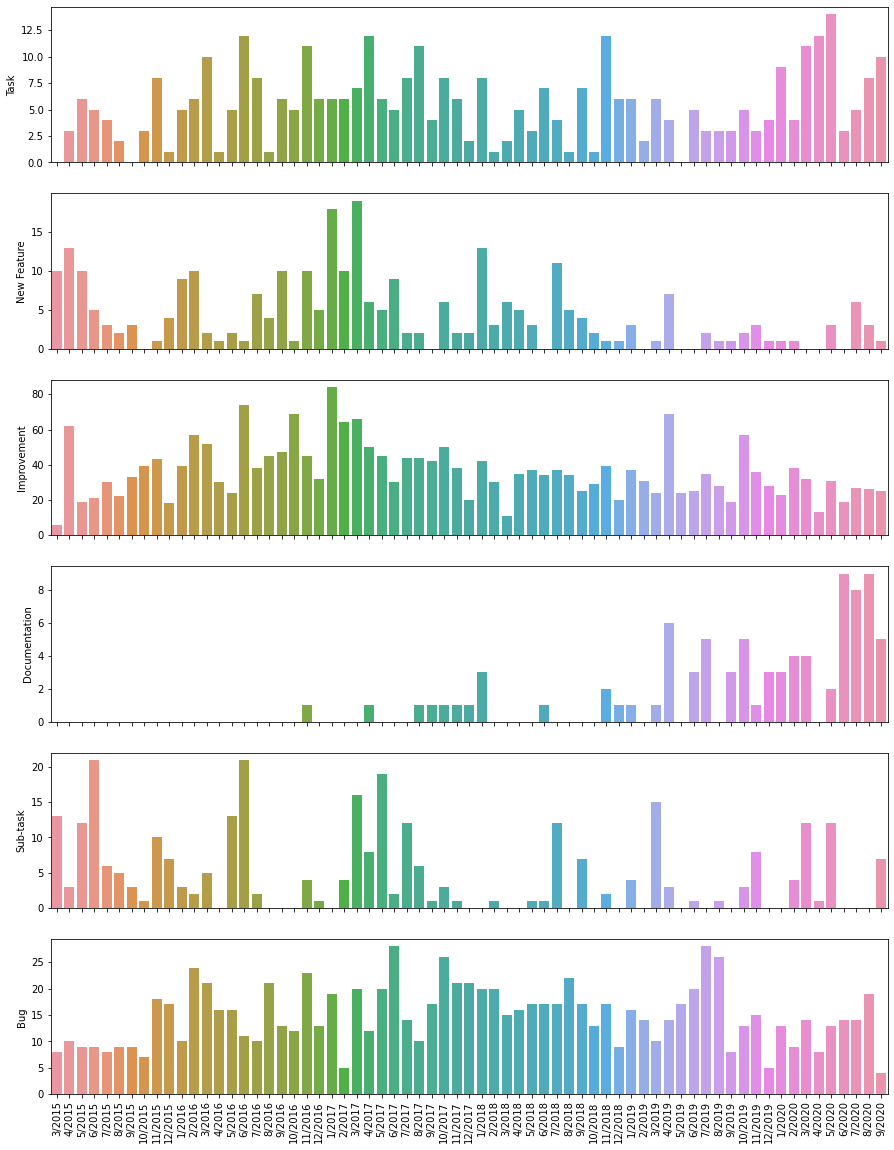

In [389]:
time_group = ["created_year", "created_month"]
f, axes = plt.subplots(len(issues.issuetype_name.unique()),1, figsize=(15,20), sharex=True)
x = issues.groupby(time_group+["issuetype_name"]).size().unstack(fill_value=0).reset_index()
for i, issuetype in enumerate(issues.issuetype_name.unique()):
    ax = sns.barplot(x=x.index, y=x[issuetype], ax=axes[i])
    ax.set_xticklabels(list(x[time_group[1]].astype(int).astype(str) + "/" + x[time_group[0]].astype(int).astype(str)),
                      rotation=90)
    ax.set_ylabel(issuetype)

* New Feature, Improvement have decresed in number over time
* Documentation has increased after 1/2019
* Bug has been quite consistent

To note that the y-axis is not the same for the different plots. We are interested in seeing their trend overtime and using the same axis would penalize the types with fewer observations. 

### Resolution

In [390]:
issues.resolution_name.unique()

array([nan, 'Fixed', 'Duplicate', "Won't Do", "Won't Fix", 'Done',
       'Not an issue', 'Canceled', 'Cannot Reproduce', 'Moved To GitHub'],
      dtype=object)

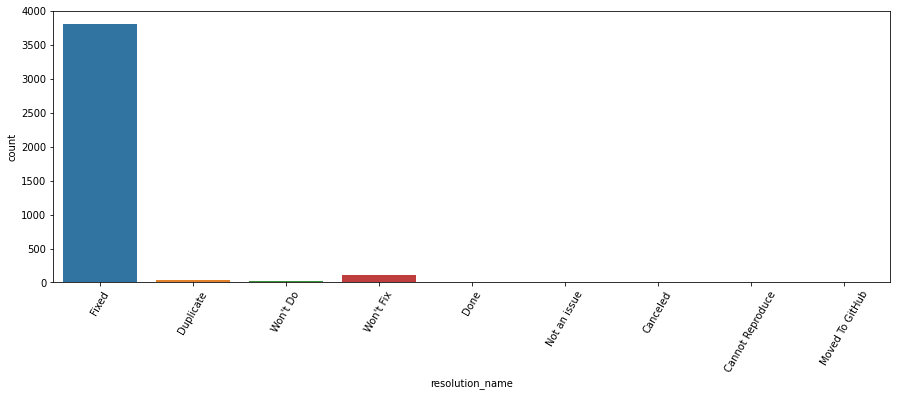

In [391]:
ax = sns.countplot(x="resolution_name", data=issues[["issue_id", "resolution_name"]])
ax.tick_params(axis='x', labelrotation= 60)

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


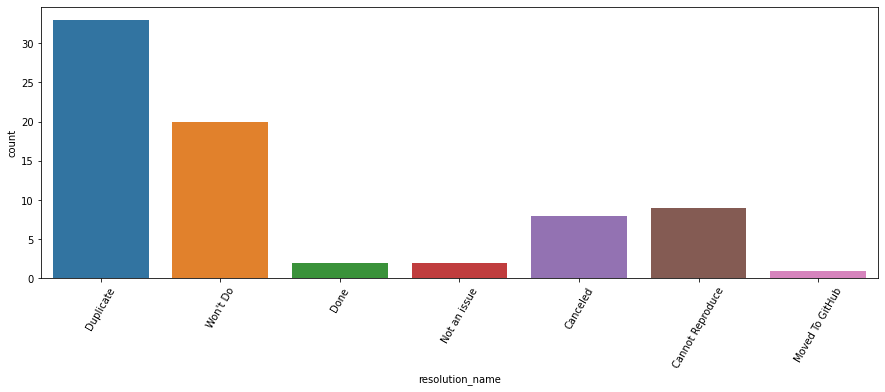

In [392]:
ax = sns.countplot(issues[~(issues.resolution_name == "Fixed") & ~(issues.resolution_name == "Won't Fix")].resolution_name)
ax.tick_params(axis='x', labelrotation= 60)

In [393]:
issues.resolution_name.value_counts(normalize=True)

Fixed               0.952571
Won't Fix           0.028707
Duplicate           0.008238
Won't Do            0.004993
Cannot Reproduce    0.002247
Canceled            0.001997
Done                0.000499
Not an issue        0.000499
Moved To GitHub     0.000250
Name: resolution_name, dtype: float64

* 95% of the resolution are Fixed
* 0.01% are duplicates (may need to be removed)

### Priority

In [394]:
issues.priority_name.unique()

array(['Major', 'Minor', 'Trivial', 'Blocker', 'Critical'], dtype=object)

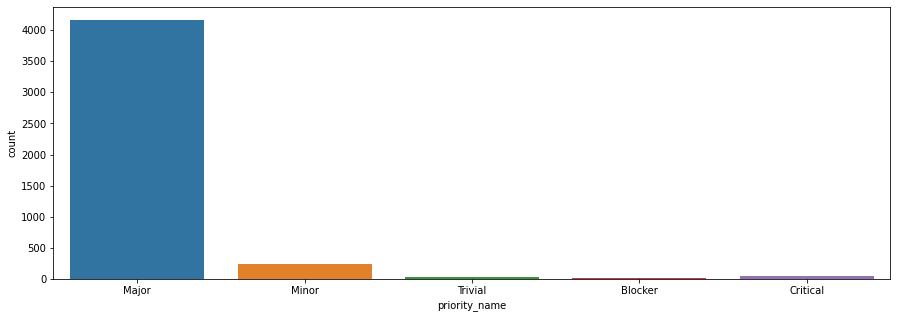

In [395]:
ax = sns.countplot(x="priority_name", data=issues[["issue_id", "priority_name"]])

In [396]:
issues.priority_name.isna().sum()

0

In [397]:
issues.priority_name.value_counts(normalize=True)

Major       0.929656
Minor       0.053149
Critical    0.008709
Trivial     0.006923
Blocker     0.001563
Name: priority_name, dtype: float64

Every issue has a priority. With issue with Major priority representing the 93%

## Labels

In [398]:
labels_merge = labels.merge(issues, on="issue_id")

**Number of labels**

In [399]:
labels.label = labels.label.str.lower()
len(labels.label.unique())

100

**Number of issues with their number of labels**

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

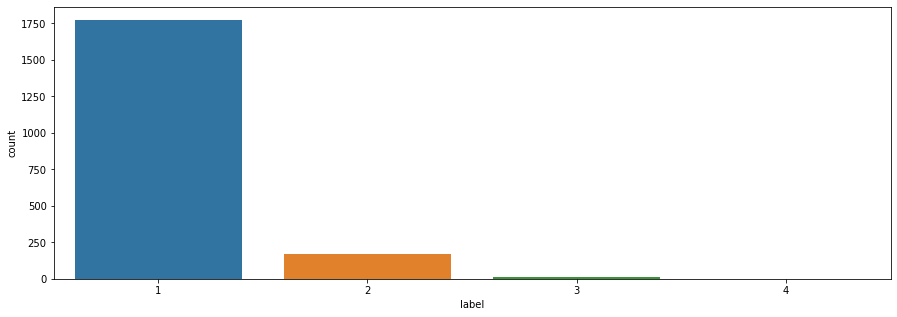

In [400]:
sns.countplot(labels_merge.groupby("issue_id").count().label)

**Top labels**

<AxesSubplot:>

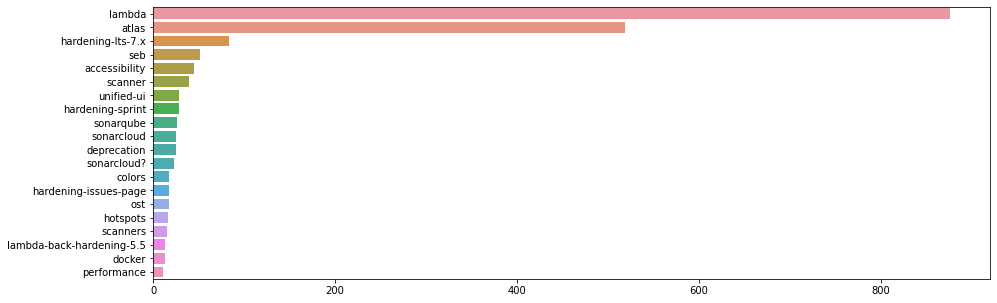

In [401]:
vals = labels.label.value_counts().head(20)
sns.barplot(x = vals.values, y=vals.index)

* Lambda label seems to be the most popular ones by far

### Versions
No need to filter only the versions after the project moved to TravisCI, since we are merging the dataframe with the issues which are filtered already

In [402]:
versions_merged = versions.merge(issues, on="issue_id")

In [403]:
versions_merged.version_name.sort_values().unique()

array(['3.5', '4.4', '4.5', '4.5.1', '4.5.2', '4.5.4', '4.5.5', '4.5.6',
       '4.5.7', '5.0', '5.1', '5.1.1', '5.1.2', '5.2', '5.3', '5.4',
       '5.5', '5.6', '5.6.1', '5.6.2', '5.6.3', '5.6.4', '5.6.5', '5.6.6',
       '5.6.7', '6.0', '6.1', '6.1.1', '6.2', '6.3', '6.3.1', '6.3.2',
       '6.4', '6.5', '6.5-M1', '6.6', '6.6-M1', '6.7', '6.7.1', '6.7.2',
       '6.7.3', '6.7.4', '6.7.5', '6.7.6', '6.7.7', '7.0', '7.1', '7.2',
       '7.2.1', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '7.9.1',
       '8.0', '8.1', '8.2', '8.3', '8.3.1', '8.4', '8.4.1'], dtype=object)

In [404]:
len(versions_merged.version_name.unique())

64

**Number of versions per tags**

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

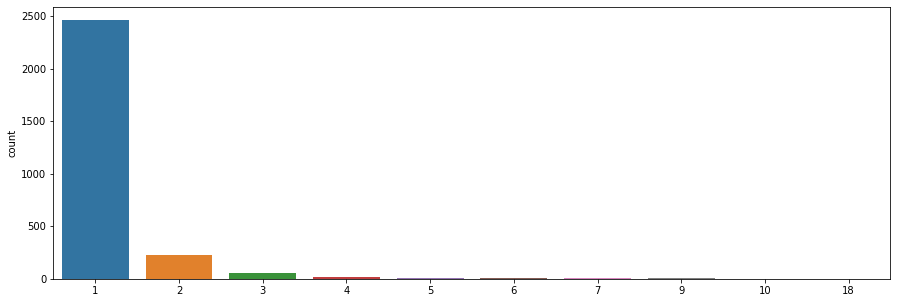

In [405]:
sns.countplot(versions.groupby("issue_id").count().version_name.values)

**Distribution of missing tags on Jira**

In [406]:
#Versions on Jira have a slightly different format at times. This functions formats the versions to match Jira's
def polish_version(version):
    splits = version.split(".")
    major = splits[0]
    release = splits[1]
    if(len(splits)>2):
        modification = splits[2]
        if(modification != "0"):
            return f"{major}.{release}.{modification}"
    """if("-" in release):
        release = release.split("-")[0]"""
    return f"{major}.{release}"
releases = set(map(lambda version: polish_version(version), tags.Tag.unique()))

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

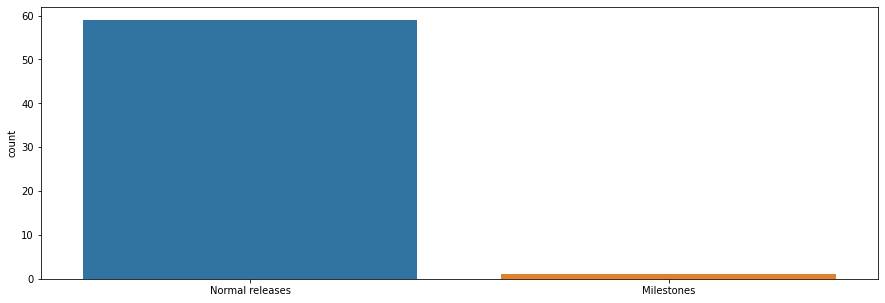

In [407]:
def type_of_version(version):
    if "RC" in version: 
        return "Release candidates"
    if "M" in version:
        return "Milestones"
    return "Normal releases"
        
    
tags_not_on_jira = releases.difference(set(versions_merged.version_name.sort_values().unique()))
tags_not_on_jira_type = list(map(lambda v: type_of_version(v), tags_not_on_jira))
github_tags_type = list(map(lambda v: type_of_version(v), tags.Tag.unique()))
sns.countplot(github_tags_type)

**Percentage of missing tags for each type**

<AxesSubplot:xlabel='Release type', ylabel='% missing on jira'>

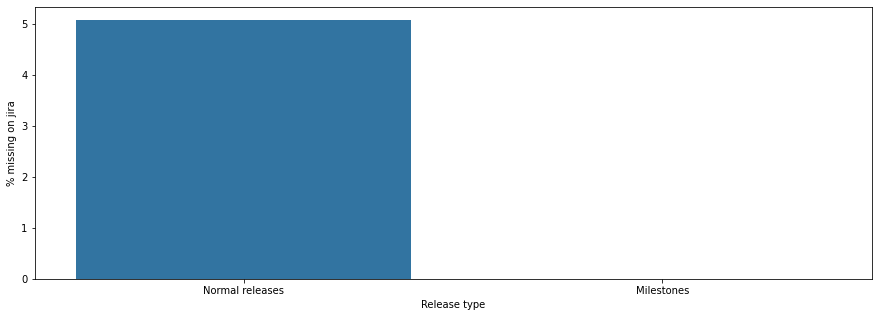

In [408]:
data = []
for typ in set(github_tags_type):
    data.append((typ,tags_not_on_jira_type.count(typ) / github_tags_type.count(typ) * 100))
data = pd.DataFrame(data, columns=["Release type", "% missing on jira"])
sns.barplot(x="Release type", y="% missing on jira", data=data)

In [409]:
data

,Release type,% missing on jira
0,Normal releases,5.084746
1,Milestones,0.000000


**Tags present on Jira but not on Github**

In [410]:
set(versions_merged.version_name.sort_values().unique()).difference(set(releases))

{'3.5',
 '4.4',
 '4.5',
 '4.5.1',
 '4.5.2',
 '4.5.4',
 '4.5.5',
 '5.0',
 '6.6-M1',
 '7.2.1'}

In [411]:
len(set(versions.version_name.sort_values().unique()).difference(set(releases)))

86

In [412]:
len(set(set(versions.version_name.sort_values().unique())).intersection(set(releases)))

57

* 55 versions are both present in Jira version field and on Github as tag
* 13 versions used on Jira do not correspond to a Tag on Github
* 100% of the release candidates are not used on Jira
* 96% of the milestones are not used on Jira
* Only 1.7% of normal releases are not used on Jira

**Percentage of issues with a version**

In [413]:
len(versions.issue_id)/(len(issues.issue_id))*100

74.47521214828048

**Top versions**

In [414]:
top_versions = versions_merged.groupby("version_name").count().issue_id.reset_index().sort_values(by="issue_id", ascending=False)

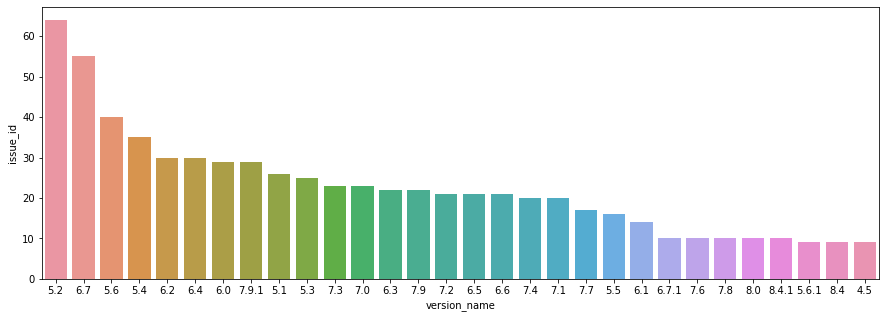

In [415]:
ax = sns.barplot(x="version_name", y="issue_id", data=top_versions[["issue_id", "version_name"]].head(30))

In [416]:
top_versions.head(10).version_name.values

array(['5.2', '6.7', '5.6', '5.4', '6.2', '6.4', '6.0', '7.9.1', '5.1',
       '5.3'], dtype=object)

**Distribution of issuetypes for each version**

In [417]:
versions_sorted = versions_merged.sort_values(by="version_name").version_name.unique()

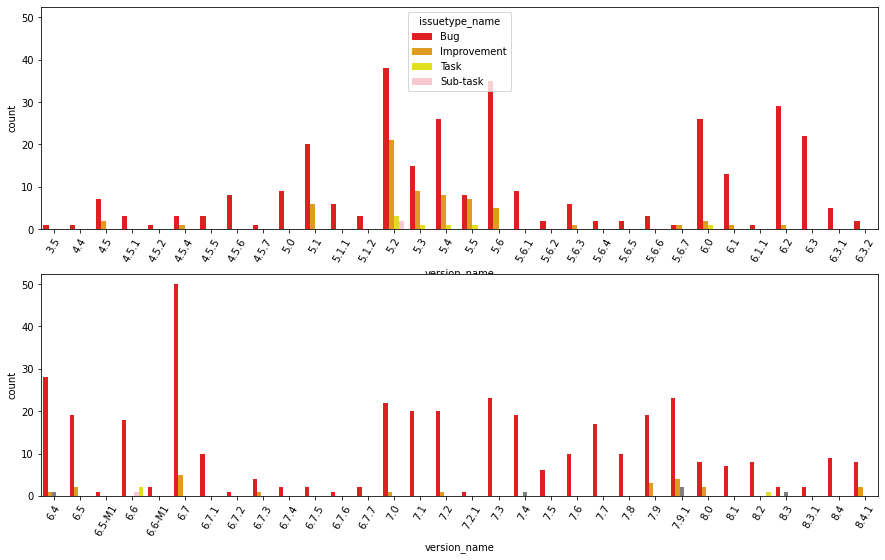

In [418]:
f, axes = plt.subplots(2,1, figsize=(15,9), sharey=True)
for i in range(2):
    data = versions_merged[versions_merged.version_name.isin(versions_sorted[32*i:32*(i+1)])]
    ax = sns.countplot(ax=axes[i], x="version_name", 
                       hue="issuetype_name", data=data.sort_values(by="version_name").head(3000),
                      palette={"Bug":"r","Improvement":"orange",
                               "New Feature": "green",
                               "Task": "yellow",
                               "Sub-task": "pink",
                              "Documentation": "grey"})
    ax.tick_params(axis='x', labelrotation= 60)
    if i > 0:
        ax.get_legend().remove()

**Percentage of issuestype with a version**

<AxesSubplot:xlabel='issuetype', ylabel='percentage_of_issue_with_version'>

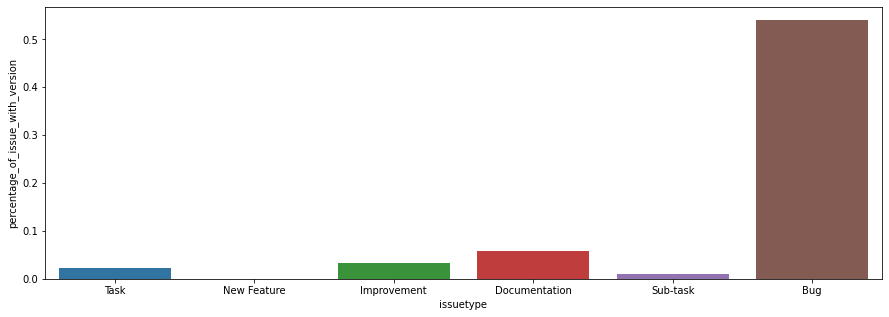

In [419]:
data = []
for issuetype in issues.issuetype_name.unique():
    data.append((issuetype, len(set(issues[issues.issuetype_name == issuetype].issue_id).intersection(set(versions.issue_id)))\
                 /len(issues[issues.issuetype_name == issuetype].issue_id)))
sns.barplot(x="issuetype", y="percentage_of_issue_with_version", data=pd.DataFrame(data, columns=["issuetype", "percentage_of_issue_with_version"]))

In [420]:
data

[('Task', 0.02185792349726776),
 ('New Feature', 0.0),
 ('Improvement', 0.03276003276003276),
 ('Documentation', 0.05813953488372093),
 ('Sub-task', 0.010033444816053512),
 ('Bug', 0.5404595404595405)]

* We have 55 versions we can use for our Travis analysis
* Only 74% of issues have a version
* 54% of issues with type Bug have a version

## FixVersions

In [421]:
fixversions = fixversions[fixversions.fixVersion_name > "4.4"]
fixversions_merged = fixversions.merge(issues, on="issue_id")

In [422]:
fixversions.fixVersion_name.unique()

array(['8.5', '8.6', '8.4.2', '9.0', '8.4.1', '8.4', '7.9.4', '8.3.1',
       '8.3', '8.2', '7.9.3', '8.1', '7.9.2', '8.0', '7.9.1', '7.9',
       '7.8', '6.7.7', '7.7', '7.6', '7.5', '6.7.6', '7.4', '6.7.5',
       '7.3', '7.2.1', '7.2', '6.7.4', '7.1', '6.7.3', '6.7.2', '7.0',
       '6.7.1', '6.7', '6.6', '6.6-M3', '6.6-M2', '6.6-M1', '5.6.7',
       '6.5', '6.5-M4', '6.5-M3', '6.5-M2', '6.5-M1', '6.4', '6.3.1',
       '6.3.2', '6.3', '5.6.6', '5.6.5', '6.2', '6.2.1', '5.6.4', '6.1.1',
       '5.6.3', '6.1', '5.6.2', '6.0', '5.6.1', '5.6', '5.5', '4.5.7',
       '5.4', '5.3', '5.2', '4.5.6', '4.5.5', '5.1.2', '5.1.1', '5.1'],
      dtype=object)

In [423]:
len(fixversions.fixVersion_name.unique())

70

In [424]:
set(fixversions.fixVersion_name.unique()) - set(tags.Tag.apply(polish_version))

{'4.5.5',
 '6.2.1',
 '6.5-M2',
 '6.5-M3',
 '6.5-M4',
 '6.6-M1',
 '6.6-M2',
 '6.6-M3',
 '7.2.1',
 '7.9.2',
 '8.5',
 '8.6',
 '9.0'}

In [425]:
set(fixversions.fixVersion_name.unique()) - set(versions.version_name.unique())

{'6.2.1',
 '6.5-M2',
 '6.5-M3',
 '6.5-M4',
 '6.6-M2',
 '6.6-M3',
 '8.5',
 '8.6',
 '9.0'}

**How many fixversions each issue has?**

In [426]:
fixversions.groupby("issue_id").fixVersion_id.count().value_counts()

1    3218
2     442
3       6
Name: fixVersion_id, dtype: int64

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fixVersion_id', ylabel='count'>

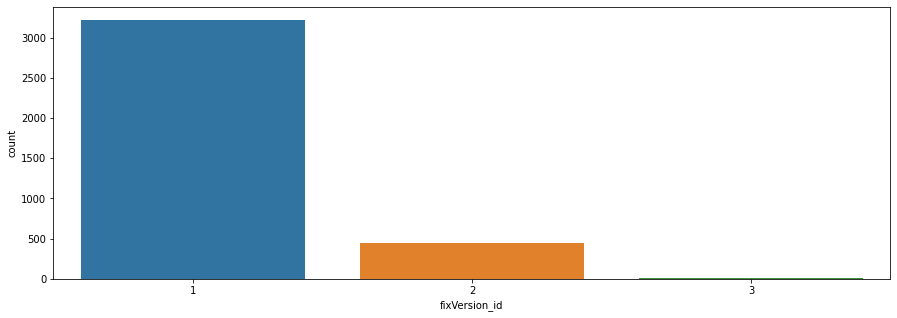

In [427]:
sns.countplot(fixversions.groupby("issue_id").fixVersion_id.count())

**Percentage of issues with a fixversion**

In [428]:
len(fixversions_merged.issue_id)/(len(issues.issue_id))*100

92.00535953550693

**Top fixversions**

In [429]:
top_fixversions = fixversions.groupby("fixVersion_name").count().issue_id.reset_index().sort_values(by="issue_id", ascending=False)

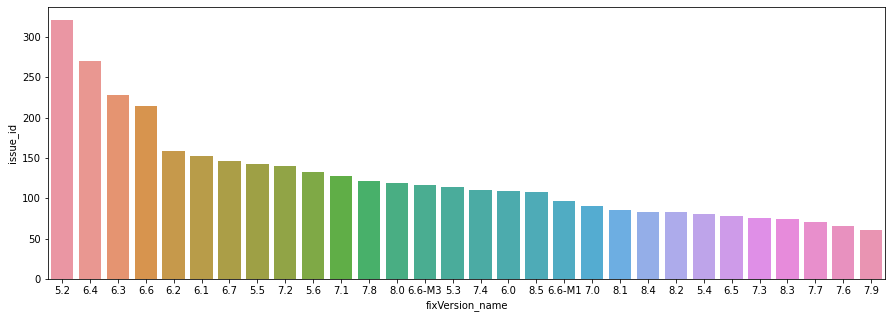

In [430]:
ax = sns.barplot(x="fixVersion_name", y="issue_id", data=top_fixversions[["issue_id", "fixVersion_name"]].head(30))

In [431]:
top_fixversions.head(10).fixVersion_name.values

array(['5.2', '6.4', '6.3', '6.6', '6.2', '6.1', '6.7', '5.5', '7.2',
       '5.6'], dtype=object)

**Distribution of issuetypes for each version**

In [432]:
fixversions_sorted = fixversions.sort_values(by="fixVersion_name").fixVersion_name.unique()

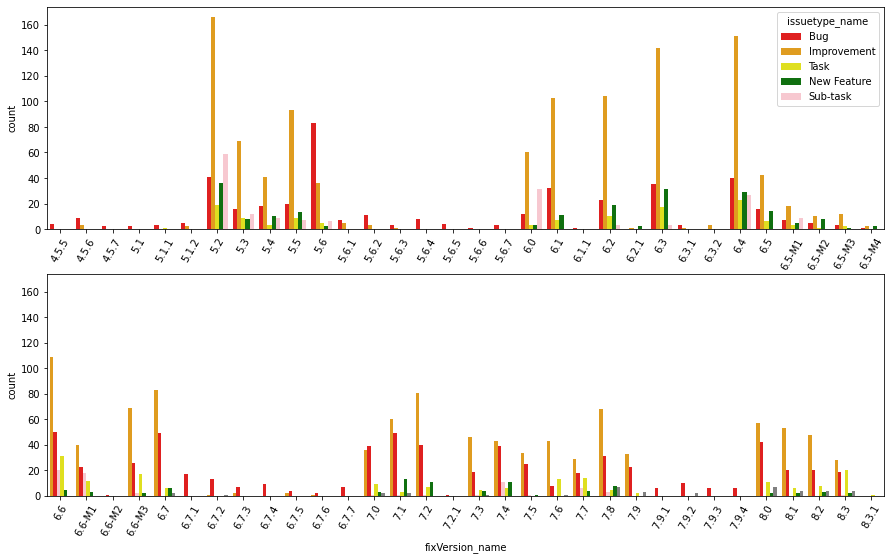

In [433]:
f, axes = plt.subplots(2,1, figsize=(15,9), sharey=True)
for i in range(2):
    data = fixversions_merged[fixversions_merged.fixVersion_name.isin(fixversions_sorted[32*i:32*(i+1)])]
    ax = sns.countplot(ax=axes[i], x="fixVersion_name", 
                       hue="issuetype_name", data=data.sort_values(by="fixVersion_name").head(3000),
                      palette={"Bug":"r","Improvement":"orange",
                               "New Feature": "green",
                               "Task": "yellow",
                               "Sub-task": "pink",
                              "Documentation": "grey"})
    ax.tick_params(axis='x', labelrotation= 60)
    if i > 0:
        ax.get_legend().remove()

**Percentage of issuestype with a version**

<AxesSubplot:xlabel='issuetype', ylabel='percentage_of_issue_with_fixversion'>

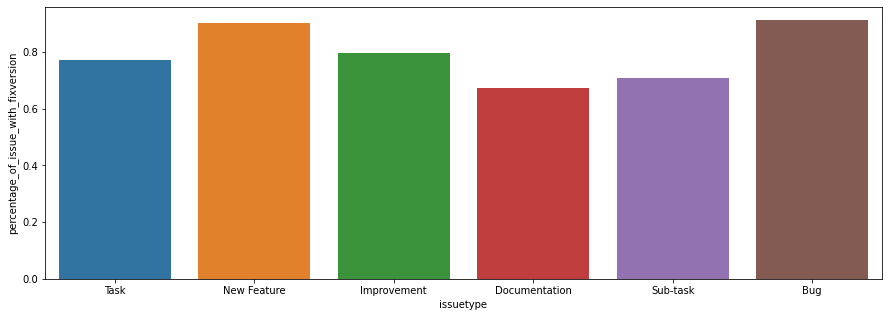

In [434]:
data = []
for issuetype in issues.issuetype_name.unique():
    issuetype_ids = issues[issues.issuetype_name == issuetype].issue_id
    data.append((issuetype, len(set(issuetype_ids).intersection(set(fixversions.issue_id)))\
                 /len(issuetype_ids)))
sns.barplot(x="issuetype", y="percentage_of_issue_with_fixversion", data=pd.DataFrame(data, columns=["issuetype", "percentage_of_issue_with_fixversion"]))

In [435]:
data

[('Task', 0.7704918032786885),
 ('New Feature', 0.9014084507042254),
 ('Improvement', 0.7960687960687961),
 ('Documentation', 0.6744186046511628),
 ('Sub-task', 0.7090301003344481),
 ('Bug', 0.913086913086913)]

* We have 70 (but 13 not on Github) fix versions we can use for our Travis analysis
* 92% of issues have a fixversion
* The issuetypes with most issues with a fixversion are Bug and New Feature

## No version issues
Ideally all bugs would be labeled with a version. Why is it not the case?

In [436]:
no_version_issues = issues[~issues.issue_id.isin(versions.issue_id.unique())]
bug_no_version = no_version_issues[no_version_issues.issuetype_name == "Bug"]
bug_no_version.head()

,created_month,votes_votes,priority_name,status,resolutiondate,assignee,created,assignee_name,reporter_name,issuetype_id,updated,issue_key,issue_id,duedate,creator_name,environment,resolution_name,votes,creator,edition,lastViewed,status_id,priority_id,issuetype_name,description,status_name,project,summary,created_year,reporter
43,9,0,Major,Closed,2020-09-18 09:41:58+00:00,Jeremy Davis,2020-09-08 07:52:57+00:00,jeremy.davis,jacek.poreda,1,2020-09-18 09:41:58+00:00,SONAR-13857,97360,2020-09-21 00:00:00+00:00,jacek.poreda,NaN,Fixed,0,Jacek Poreda,Community,NaT,6,3,Bug,Facet `Security Review` is not working while c...,Closed,SONAR,Projects page - Security Review facet on new c...,2020,Jacek Poreda
46,9,0,Major,Open,NaT,NaN,2020-09-04 22:18:18+00:00,NaN,duarte.meneses,1,2020-09-04 22:20:07+00:00,SONAR-13854,97337,NaT,duarte.meneses,NaN,NaN,0,Duarte Meneses,Community,NaT,1,3,Bug,All plugins extending a base plugin share the ...,Open,SONAR,Identification of the plugin that created a ru...,2020,Duarte Meneses
52,9,0,Major,Closed,2020-09-04 13:22:54+00:00,Jeremy Davis,2020-09-02 15:59:37+00:00,jeremy.davis,jeremy.davis,1,2020-09-04 13:22:54+00:00,SONAR-13847,97230,2020-09-10 00:00:00+00:00,jeremy.davis,NaN,Fixed,0,Jeremy Davis,Community,NaT,6,3,Bug,"When a new project is analyzed, the page is su...",Closed,SONAR,Project overview isn't refreshed after first a...,2020,Jeremy Davis
67,8,0,Major,Closed,2020-08-28 14:35:24+00:00,Duarte Meneses,2020-08-27 17:28:16+00:00,duarte.meneses,duarte.meneses,1,2020-08-28 14:35:24+00:00,SONAR-13827,97063,2020-09-03 00:00:00+00:00,duarte.meneses,NaN,Fixed,0,Duarte Meneses,Community,NaT,6,3,Bug,Due to a mistake implementing the new SCM API ...,Closed,SONAR,"New Code Period set to ""reference branch"" is n...",2020,Duarte Meneses
68,8,0,Minor,Closed,2020-08-28 12:04:45+00:00,Julien Lancelot,2020-08-27 15:49:37+00:00,julien.lancelot,julien.lancelot,1,2020-08-28 12:04:45+00:00,SONAR-13826,97061,2020-09-03 00:00:00+00:00,julien.lancelot,NaN,Fixed,0,Julien Lancelot,Community,NaT,6,4,Bug,When requesting {{api/qualityprofiles/backup}}...,Closed,SONAR,api/qualityprofiles/backup is returning HTTP c...,2020,Julien Lancelot


In [444]:
len(bug_no_version)

460

**Issues with no version and their resolution type distribution**

In [445]:
no_version_issues.resolution_name.value_counts(normalize=True)

Fixed               0.949647
Won't Fix           0.030330
Duplicate           0.007951
Won't Do            0.005889
Cannot Reproduce    0.002356
Canceled            0.002356
Done                0.000589
Not an issue        0.000589
Moved To GitHub     0.000294
Name: resolution_name, dtype: float64

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='resolution_name', ylabel='count'>

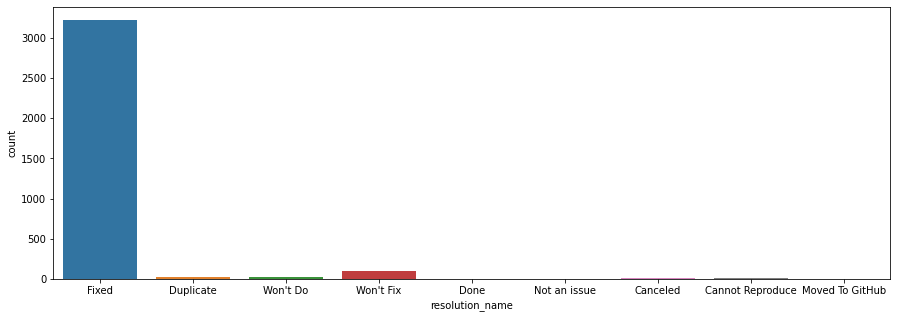

In [446]:
sns.countplot(no_version_issues.resolution_name)

**Percentage of issues with no versions over the years**

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

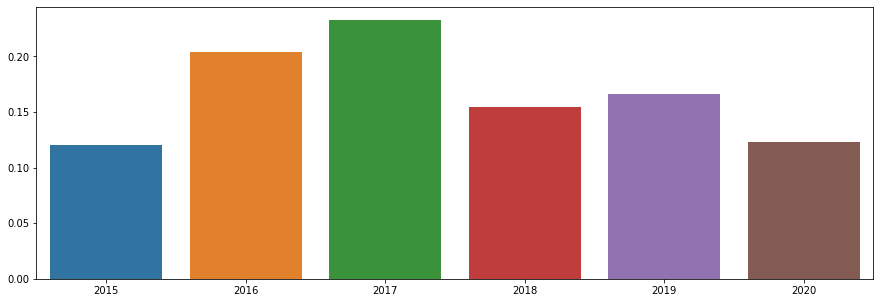

In [447]:
x = no_version_issues.created_year.value_counts(normalize=True).sort_index()
sns.barplot(x.index, x.values)

**Bugs with no version resolution type distribution**

In [450]:
bug_no_version.resolution_name.value_counts()

Fixed               415
Won't Fix            14
Cannot Reproduce      6
Duplicate             2
Name: resolution_name, dtype: int64

In [448]:
bug_no_version.resolution_name.value_counts(normalize=True)

Fixed               0.949657
Won't Fix           0.032037
Cannot Reproduce    0.013730
Duplicate           0.004577
Name: resolution_name, dtype: float64

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='resolution_name', ylabel='count'>

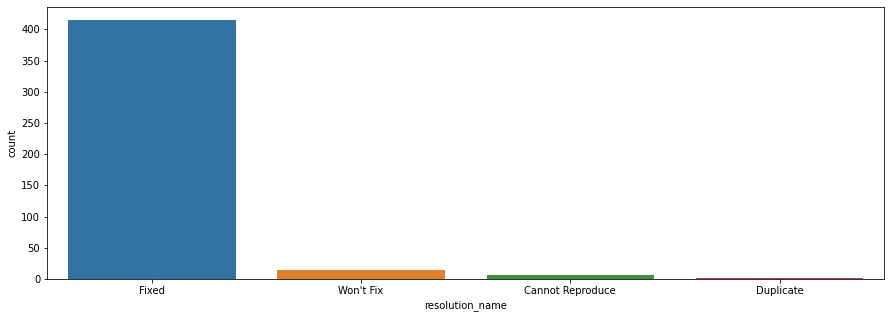

In [449]:
sns.countplot(bug_no_version.resolution_name)

* 94% of the issues with no version have been fixed
* 94% of the issues with no version AND of type Bug have been fixed

This means that for almost 415 bug issues a solution has been found. This can possibly be exploited for identifying in which version the bug was introduced.

### Status

In [442]:
issues.status.unique()

array(['Open', 'In Review', 'In Progress', 'To Do', 'Closed', 'Resolved',
       'Reopened'], dtype=object)

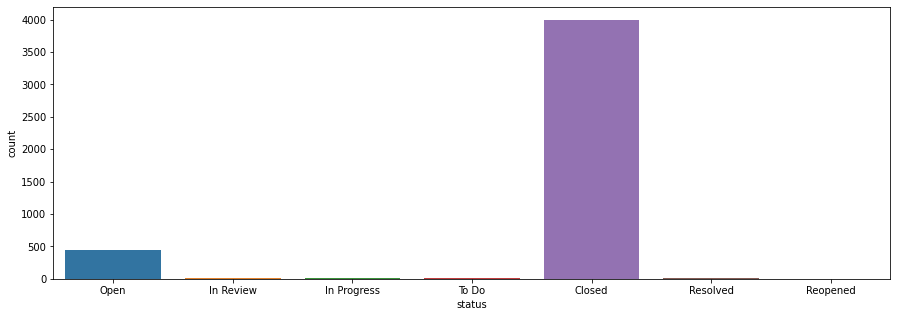

In [443]:
ax = sns.countplot(x="status", data=issues[["issue_id", "status"]])

### Further analysis
* Time between issue reported and closed
* Number of subtasks per issue